In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
import pyarrow.parquet as pq

In [3]:
games=pd.read_parquet("games.parquet")
items=pd.read_parquet("items.parquet")
reviews=pd.read_parquet("reviews.parquet")

In [4]:
# Hace el merge entre los DataFrames games y reviews utilizando la columna 'id' como clave
merged_df = pd.merge(games, reviews, on='item_id')

In [211]:
#merged_df["recomendación"] = np.where((merged_df['sentiment_analysis'] == 2) & (merged_df['recommend'] == 1), 1, 0)

In [4]:
reader = Reader()

In [ ]:
#Definir un lector para el formato de tus datos
reader = Reader(rating_scale=(0, 5))  # Adaptar rating_scale a tus datos

data = Dataset.load_from_df(merged_df[['user_id', 'item_id', 'rating']], reader)

#Dividir el conjunto de datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2)  # Puedes ajustar el tamaño de prueba

#Seleccionar un algoritmo (por ejemplo, SVD) y entrenar el modelo
model = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)

#Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

#Evaluar las predicciones
accuracy.rmse(predictions)
#ID del usuario para el cual quieres obtener recomendaciones
usuario_especifico = 'laislabonita75'  # Reemplaza 'js41637' con el ID del usuario para el que quieres las recomendaciones

#Crear una lista de juegos ya valorados por el usuario específico
juegos_valorados = merged_df[merged_df['user_id'] == usuario_especifico]['app_name'].unique()

#Crear una lista de todos los juegos disponibles
todos_los_juegos = merged_df['app_name'].unique()

#Crear una lista de juegos no valorados por el usuario específico
juegos_no_valorados = list(set(todos_los_juegos) - set(juegos_valorados))

#Generar predicciones para los juegos no valorados por el usuario
predicciones = [model.predict(usuario_especifico, juego) for juego in juegos_no_valorados]

#Ordenar las predicciones en base a la valoración y obtener los juegos recomendados
recomendaciones = sorted(predicciones, key=lambda x: x.est, reverse=True)[:5]  # Obtener las 5 mejores recomendaciones

#Mostrar los juegos recomendados
for recomendacion in recomendaciones:
    print(f"Juego: {recomendacion.iid}, Valoración estimada: {recomendacion.est}")

In [57]:
#Definir un lector para el formato de tus datos
reader = Reader(rating_scale=(0, 2))  # Adaptar rating_scale a tus datos

N_filas = 100000 # Limitamos el dataset a N_filas

data = Dataset.load_from_df(merged_df[['user_id', 'item_id', 'sentiment_analysis']][:N_filas], reader)

#Dividir el conjunto de datos en entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2)  # Puedes ajustar el tamaño de prueba

#Seleccionar un algoritmo (por ejemplo, SVD) y entrenar el modelo
model = SVD()
model.fit(trainset)

#Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

#Evaluar las predicciones
accuracy.rmse(predictions)
#ID del usuario para el cual quieres obtener recomendaciones
usuario_especifico = 'LydiaMorley'  # Reemplaza 'js41637' con el ID del usuario para el que quieres las recomendaciones

#Crear una lista de juegos ya valorados por el usuario específico
juegos_valorados = merged_df[merged_df['user_id'] == usuario_especifico]['app_name'].unique()

#Crear una lista de todos los juegos disponibles
todos_los_juegos = merged_df['app_name'].unique()

#Crear una lista de juegos no valorados por el usuario específico
juegos_no_valorados = list(set(todos_los_juegos) - set(juegos_valorados))

#Generar predicciones para los juegos no valorados por el usuario
predicciones = [model.predict(usuario_especifico, juego) for juego in juegos_no_valorados]

#Ordenar las predicciones en base a la valoración y obtener los juegos recomendados
recomendaciones = sorted(predicciones, key=lambda x: x.est, reverse=True)[:5]  # Obtener las 5 mejores recomendaciones

#Mostrar los juegos recomendados
for recomendacion in recomendaciones:
    print(f"Juego: {recomendacion.iid}, Valoración estimada: {recomendacion.est}")

RMSE: 0.7442
Juego: EverQuest® II Free-To-Play. Your Way.™, Valoración estimada: 1.497331731440865
Juego: Freedom Force, Valoración estimada: 1.497331731440865
Juego: Nancy Drew®: Legend of the Crystal Skull, Valoración estimada: 1.497331731440865
Juego: YOU DON'T KNOW JACK HEADRUSH, Valoración estimada: 1.497331731440865
Juego: Астролорды: Облако Оорта, Valoración estimada: 1.497331731440865


In [8]:
usuario = "js41637"
rating = 0  # le pedimos peliculas a las que haya puesto 4 o 5 estrellas
df_user = reviews[(reviews['user_id'] == usuario) & (reviews['sentiment_analysis'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user['app_name'] = games['app_name'].loc[df_user.item_id].values
df_user

KeyError: "None of [Index([251610, 227300, 239030], dtype='int64')] are in the [index]"

In [6]:
recomendaciones_usuario = merged_df.iloc[:4499].copy() #creamos donde vanmos a guardar las recomendaciones
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(4499, 33)


,app_name,tags,price,item_id,developer,año_lanzamiento,Accounting,Action,Adventure,Animation &amp; Modeling,...,Sports,Strategy,Utilities,Video Production,Web Publishing,user_id,helpful,recommend,año,sentiment_analysis
0,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,0,...,0,0,0,0,0,EizanAratoFujimaki,14 of 19 people (74%) found this review helpful,True,2015,0
1,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,0,...,0,0,0,0,0,GamerFag,No ratings yet,True,2011,0
2,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,0,...,0,0,0,0,0,76561198020928326,2 of 2 people (100%) found this review helpful,True,2014,2
3,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,0,...,0,0,0,0,0,Bluegills,No ratings yet,True,2013,2
4,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,0,...,0,0,0,0,0,76561198071955492,No ratings yet,True,2013,2


In [7]:
usuario_vistas = merged_df[merged_df['user_id'] == usuario] #juegos del usuario
print(usuario_vistas.shape)
usuario_vistas

(0, 33)


,app_name,tags,price,item_id,developer,año_lanzamiento,Accounting,Action,Adventure,Animation &amp; Modeling,...,Sports,Strategy,Utilities,Video Production,Web Publishing,user_id,helpful,recommend,año,sentiment_analysis


In [19]:
recomendaciones_usuario.drop(usuario_vistas.item_id, inplace = True)
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario

,index,app_name,tags,price,item_id,developer,año_lanzamiento,Accounting,Action,Adventure,...,Sports,Strategy,Utilities,Video Production,Web Publishing,user_id,helpful,recommend,año,sentiment_analysis
0,0,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,...,0,0,0,0,0,EizanAratoFujimaki,14 of 19 people (74%) found this review helpful,True,2015,0
1,1,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,...,0,0,0,0,0,GamerFag,No ratings yet,True,2011,0
2,2,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,...,0,0,0,0,0,76561198020928326,2 of 2 people (100%) found this review helpful,True,2014,2
3,3,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,...,0,0,0,0,0,Bluegills,No ratings yet,True,2013,2
4,4,Half-Life,"['FPS', 'Classic', 'Action', 'Sci-fi', 'Single...",9.99,70,Valve,1998,0,1,0,...,0,0,0,0,0,76561198071955492,No ratings yet,True,2013,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4488,4494,Red Orchestra 2: Heroes of Stalingrad with Ris...,"['Realistic', 'World War II', 'FPS', 'Multipla...",19.99,35450,Tripwire Interactive,2011,0,1,0,...,0,0,0,0,0,coonfag,No ratings yet,True,2014,1
4489,4495,Red Orchestra 2: Heroes of Stalingrad with Ris...,"['Realistic', 'World War II', 'FPS', 'Multipla...",19.99,35450,Tripwire Interactive,2011,0,1,0,...,0,0,0,0,0,76561198028065214,No ratings yet,True,2011,2
4490,4496,Red Orchestra 2: Heroes of Stalingrad with Ris...,"['Realistic', 'World War II', 'FPS', 'Multipla...",19.99,35450,Tripwire Interactive,2011,0,1,0,...,0,0,0,0,0,76561198043880297,1 of 1 people (100%) found this review helpful,True,2013,2
4491,4497,Red Orchestra 2: Heroes of Stalingrad with Ris...,"['Realistic', 'World War II', 'FPS', 'Multipla...",19.99,35450,Tripwire Interactive,2011,0,1,0,...,0,0,0,0,0,PlushTurtle,No ratings yet,True,2013,2


In [20]:
recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['item_id'].apply(lambda x: entrenamiento.predict(usuario, x).est)

In [21]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
print(recomendaciones_usuario.head(10))

      index              app_name  \
1835   1841  IL-2 Sturmovik: 1946   
1838   1844  IL-2 Sturmovik: 1946   
1836   1842  IL-2 Sturmovik: 1946   
1834   1840  IL-2 Sturmovik: 1946   
1833   1839  IL-2 Sturmovik: 1946   
1832   1838  IL-2 Sturmovik: 1946   
1831   1837  IL-2 Sturmovik: 1946   
1837   1843  IL-2 Sturmovik: 1946   
4413   4419             Tropico 4   
4414   4420             Tropico 4   

                                                   tags  price  item_id  \
1835  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    15320   
1838  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    15320   
1836  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    15320   
1834  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    15320   
1833  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    15320   
1832  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    15320   
1831  ['Simulation', 'Flight', 'World War II', 'Mili...   9.99    1

In [23]:
entrenamiento.predict("72947282842",730)

Prediction(uid='72947282842', iid=730, r_ui=None, est=1.5040436550086431, details={'was_impossible': False})

RMSE: 0.7345


0.7345272092260661

In [260]:
#optimizacion de hiperparametros 
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7354  0.7332  0.7347  0.7344  0.0009  
Fit time          0.34    0.28    0.25    0.29    0.04    
Test time         0.13    0.09    0.09    0.10    0.02    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7345  0.7316  0.7361  0.7341  0.0019  
Fit time          0.30    0.29    0.32    0.30    0.01    
Test time         0.17    0.38    0.12    0.22    0.11    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7315  0.7369  0.7296  0.7327  0.0031  
Fit time          0.31    0.26    0.36    0.31    0.04    
Test time         0.10    0.11    0.20    0.13    0.04    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.7297  0.7

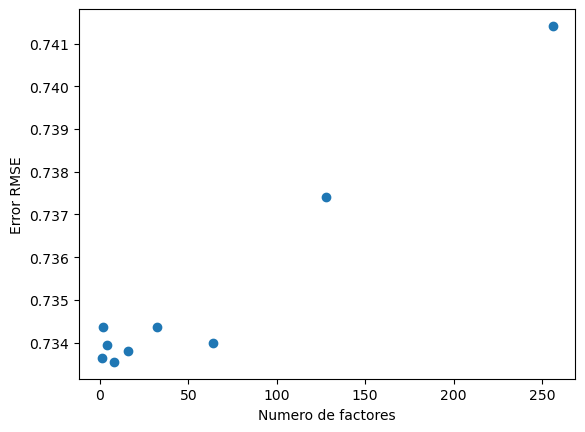

In [251]:
# Ploteamos desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [257]:
# Nuevamente, no apto para ansiosos

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [259]:
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.7311025951058209
{'n_factors': 5, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}
